In [398]:
import pandas as pd
import matplotlib.pyplot as plt
import json

## 1. Exploratory Data Analysis

### Dataframes preparation

In [464]:
# Create a function parsing lines in the homology files

def parse_lines(line):
    # Add list to be returned
    rows = list()
    # Loop through each item in line
    for key, value in line.items():
        if key == 'acc':
            acc = value
        else:
            evidence, feature, source = key.split('-')
            for k, v in value.items():
                if k == 'regions':
                    for item in range(len(v)):
                        reg = v[item]
                        start, end = reg[0], reg[1]
                        rows.append({
                            'acc': acc, 
                            'evidence': evidence, 
                            'feature': feature,
                            'source': source, 
                            'start': start, 
                            'end': end
                        })

    # Return parsed rows
    return rows

In [477]:
# Open the .mjson files using the function created above

# Initialize rows in dataframe
data = list()
# Open file
with open('homology.mjson', 'r') as file:
  # Loop through each line in file
  for line in file:
    # Cast line (JSON) to object
    obj = json.loads(line)
    rows = parse_lines(obj)
    data.extend(rows)

In [478]:
# Convert the list to DataFrame

d1 = pd.DataFrame(data)
d1.head()

,acc,evidence,feature,source,start,end
0,A0A009HC73,homology,conformational_diversity,codnas,1,308
1,A0A009I561,homology,conformational_diversity,codnas,1,308
2,A0A009IUT7,homology,conformational_diversity,codnas,1,308
3,A0A009KQW8,homology,conformational_diversity,codnas,1,304
4,A0A009MPB7,homology,conformational_diversity,codnas,1,308


KeyboardInterrupt: 

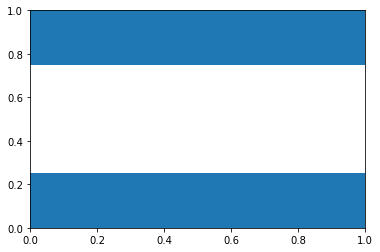

In [487]:
d1.value_counts().plot(kind='barh', subplots=True)

Text(0, 0.5, 'Feature')

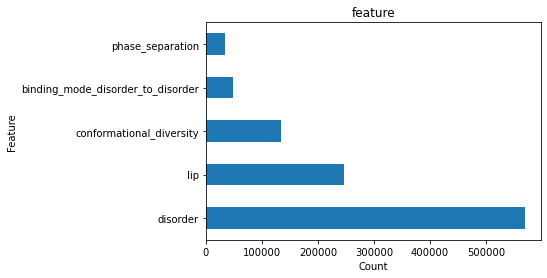

In [486]:
d1['feature'].value_counts().plot(kind='barh')
plt.xlabel("Count")
plt.ylabel("Feature")

Text(0, 0.5, 'Source')

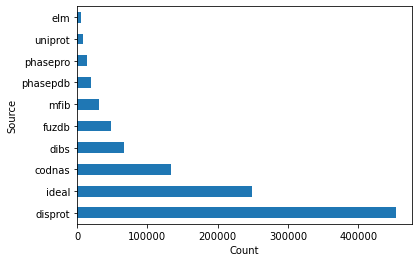

In [483]:
d1['source'].value_counts().plot(kind='barh')
plt.xlabel("Count")
plt.ylabel("Source")